In [1]:
# !python3 -m pip install --user neo elephant viziphant

# SPADE tutorial
## Generate correlated data

In [2]:
import numpy as np
import quantities as pq
import neo
import elephant
import viziphant
np.random.seed(4542)

In [3]:
spiketrains = elephant.spike_train_generation.compound_poisson_process(
   rate=5*pq.Hz, A=[0]+[0.98]+[0]*8+[0.02], t_stop=10*pq.s)
len(spiketrains)

10

In [4]:
for i in range(90):
    spiketrains.append(elephant.spike_train_generation.homogeneous_poisson_process(
        rate=5*pq.Hz, t_stop=10*pq.s))

In [5]:
print("spiketrain_0 type is", type(spiketrains[0]))
print("spiketrains_last type is", type(spiketrains[-1]))

spiketrain_0 type is <class 'neo.core.spiketrain.SpikeTrain'>
spiketrains_last type is <class 'neo.core.spiketrain.SpikeTrain'>


In [6]:
print(f"spiketrain_0 has {len(spiketrains[0])} spikes:")
print("  t_start:", spiketrains[0].t_start)
print("  t_stop:", spiketrains[0].t_stop)
print("  spike times:", spiketrains[0].times)

spiketrain_0 has 39 spikes:
  t_start: 0.0 s
  t_stop: 10.0 s
  spike times: [0.3428428  0.36964823 1.22303783 1.28863725 1.63905792 2.88270894
 3.03516076 3.03817857 3.41886987 3.46763254 3.83237276 3.85699453
 4.17892833 4.18912792 4.50264362 5.11709083 5.25194019 5.32478839
 6.39516735 6.50198542 6.92936517 6.98985003 7.10209661 7.15895706
 7.56589684 7.78118491 8.24170386 8.31116287 8.49874386 8.70570514
 8.91675734 8.97507227 9.03423901 9.03853449 9.15468654 9.39298729
 9.52941963 9.61571811 9.9134528 ] s


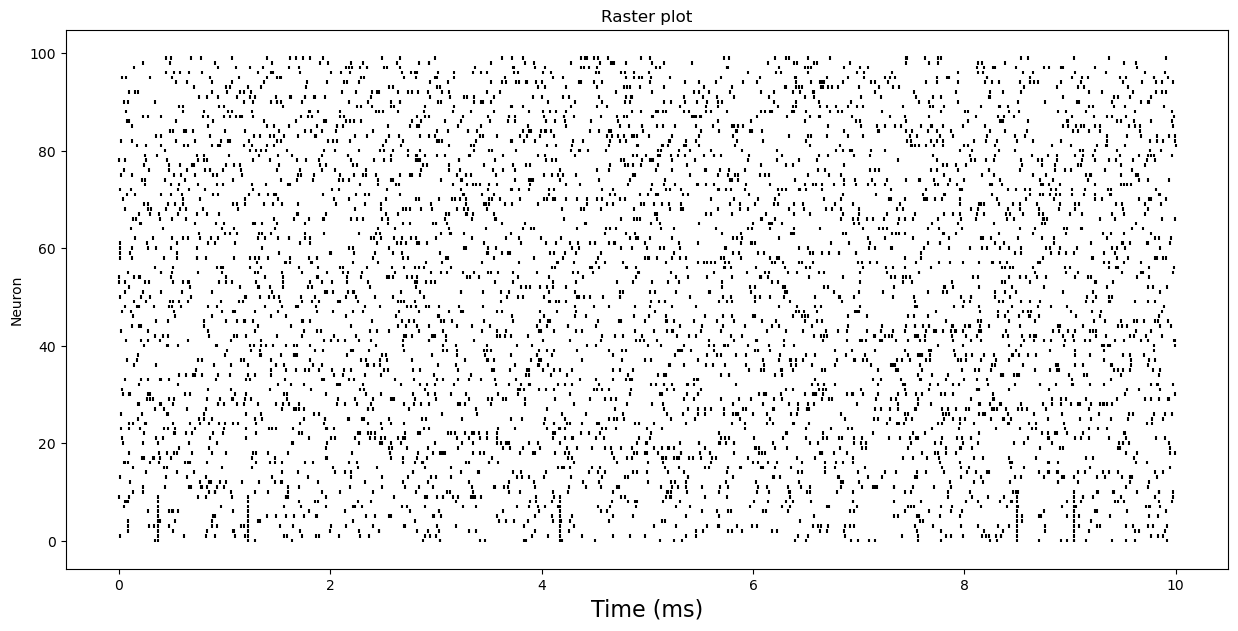

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 7))
ax.eventplot([spiketrains[i].magnitude for i in range(len(spiketrains))], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Neuron')
plt.title("Raster plot");

In [8]:
from brainhack import printfig
printfig(fig, 'raster_plot_for_spade')

/Users/laurentperrinet/opt/anaconda3/envs/brainhack/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


figures/raster_plot_for_spade.png


In [9]:
np.random.permutation?

Docstring:
permutation(x)

Randomly permute a sequence, or return a permuted range.

If `x` is a multi-dimensional array, it is only shuffled along its
first index.

.. note::
    New code should use the ``permutation`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
x : int or array_like
    If `x` is an integer, randomly permute ``np.arange(x)``.
    If `x` is an array, make a copy and shuffle the elements
    randomly.

Returns
-------
out : ndarray
    Permuted sequence or array range.

See Also
--------
random.Generator.permutation: which should be used for new code.

Examples
--------
>>> np.random.permutation(10)
array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6]) # random

>>> np.random.permutation([1, 4, 9, 12, 15])
array([15,  1,  9,  4, 12]) # random

>>> arr = np.arange(9).reshape((3, 3))
>>> np.random.permutation(arr)
array([[6, 7, 8], # random
       [0, 1, 2],
       [3, 4, 5]])
Type:      builtin_function_or_method


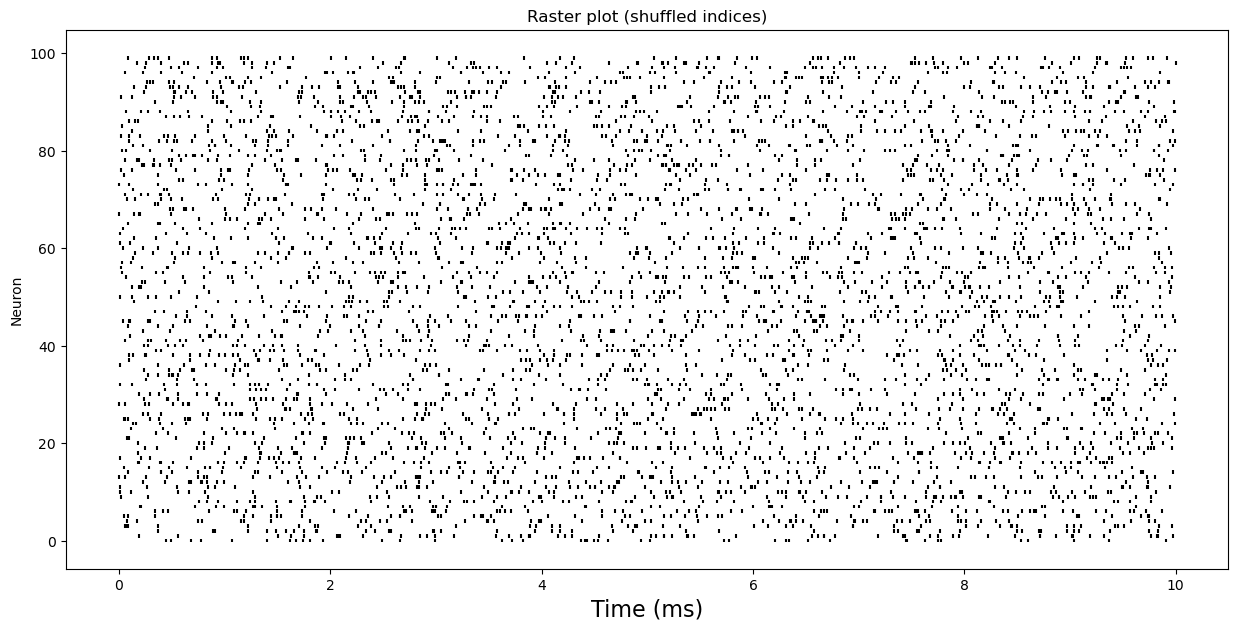

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.eventplot([spiketrains[i].magnitude for i in np.random.permutation(len(spiketrains))], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Neuron')
plt.title("Raster plot (shuffled indices)");

## Mining patterns with SPADE 

In [11]:
elephant.spade.spade?

Signature:
elephant.spade.spade(
    spiketrains,
    bin_size,
    winlen,
    min_spikes=2,
    min_occ=2,
    max_spikes=None,
    max_occ=None,
    min_neu=1,
    approx_stab_pars=None,
    n_surr=0,
    dither=array(15.) * ms,
    spectrum='#',
    alpha=None,
    stat_corr='fdr_bh',
    surr_method='dither_spikes',
    psr_param=None,
    output_format='patterns',
    **surr_kwargs,
)
Docstring:
Perform the SPADE :cite:`spade-Torre2013_132`,
:cite:`spade-Quaglio2017_41`, :cite:`spade-Stella2019_104022` analysis for
the parallel input `spiketrains`. They are discretized with a temporal
resolution equal to `bin_size` in a sliding window of `winlen*bin_size`.

First, spike patterns are mined from the `spiketrains` using a technique
called frequent itemset mining (FIM) or formal concept analysis (FCA). In
this framework, a particular spatio-temporal spike pattern is called a
"concept". It is then possible to compute the stability and the p-value
of all pattern candidates. In a final 

In [12]:
patterns = elephant.spade.spade(
    spiketrains=spiketrains, binsize=1*pq.ms, winlen=1, min_spikes=3,
    n_surr=100,dither=5*pq.ms,
    psr_param=[0,0,0],
    output_format='patterns')['patterns']

/Users/laurentperrinet/opt/anaconda3/envs/brainhack/lib/python3.9/site-packages/elephant/spade.py:679: UserWarning: Optimized C implementation of FCA (fim.so/fim.pyd) not found in elephant/spade_src folder, or not compatible with this Python version. You are using the pure Python implementation of fast fca.
  warnings.warn(


Time for data mining: 10.749012231826782


In [ ]:
patterns

In [ ]:
fig, ax = plt.subplots()
ax = viziphant.patterns.plot_patterns(spiketrains, patterns, axes=ax)